In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
data1 = pd.read_table('menuitems.normalized', " [+] ", engine = 'python', header = None)
data2 = data1.drop(5, axis=1)
data2[4] = data2[4].astype(str)
data2 = data2.groupby([0,3])[4].apply(lambda x: ' '.join(x)).reset_index()
data1.head(1)

,0,1,2,3,4,5
0,Tiffin Etc.,indian,philadelphia,$$,aloo paratha mashed potatoes flavored with tan...,3.5


In [4]:
data3 = data2.drop(4, axis = 1)
data3.head(1)

,0,3
0,#1 Chop Suey,$


In [5]:
data4 = data2.drop(3, axis=1)
data4.head(1)

,0,4
0,#1 Chop Suey,pork noodle soup large ham small extra onion h...


In [7]:
data_dict = data4 
data_dict.head()
data_dict2 = data_dict.set_index(0)[4].to_dict()
data_dict2.itervalues().next()

'chilled corn soup with cilantro royale shellfish emulsion salad of heirloom tomato sheep s milk ricotta baby coconut solera vinegar carpaccio of octopus artichoke vinaigrette sardines on toast avocado black olive basil roasted maine scallops english oeas hazelnut and brown butter braised escolar fried green tomatoes minestrone broth toasted alaskan spot prawns tater tots whole roasted fish of the day galantine of guinea hen macerated peaches oven roasted bone marrow vandouvan crust foie gras candy bar macadamia cocoa butter chocolate orchid fruit braised beef rib homemade steak sauce roasted day aged strip loin of beef forestiere sauce roasted all natural chicken leg fricassee muscovy duck breast spicy duck meatballs gumbo jus pan grilled house made half smoke sausage walla walla onion condiment summer vegetable tart tomato fondue fregola sarda with cabra la mancha cheese and shelling beans wood oven roasted fingerlings with pickled radishes potato puree with fresh garlic hand cut bdt

In [8]:
#return sparse matrix with TFIDF scores
v = TfidfVectorizer(stop_words = 'english')
x = v.fit_transform(data_dict2.values())

In [23]:
#return dense matrix to be used for PCA plotting
dense_df1 = pd.DataFrame(x.toarray())
dense_df1.head(1)

,0,1,2,3,4,5,6,7,8,9,...,47633,47634,47635,47636,47637,47638,47639,47640,47641,47642
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#add csv file of top50 words into this notebook, make into list
top_50list = pd.read_csv("top_50list.csv", sep=",")
top_50list.columns = ['index', 'word']
top_50index = top_50list["index"].tolist()

In [11]:
#using dense_df1, use only top_50list as features 
PCA_data = dense_df1[top_50index]
PCA_data.head()

,2945,2180,2821,3078,2497,2568,1802,2060,2445,1807,...,1467,2277,2534,2537,748,2643,1908,1781,2089,894
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Project 50 features onto into two dimensions
PCA_object = PCA(n_components=2)
PCA_object2 = pd.DataFrame(PCA_object.fit(PCA_data).transform(PCA_data), columns = ['x', 'y'])
#PCA_object2.columns

In [19]:
#PCA_dollar = pd.merge(PCA_object2, data3, how='outer', )
PCA_dollar = pd.concat([PCA_object2, data3], axis=1)
PCA_dollar.columns = ['x','y','name','price']
PCA_dollar2 = PCA_dollar.dropna()
PCA_object2.head(1)

,x,y
0,-0.01156,-0.000173


In [20]:
PCA_dollar2['price'].value_counts()

$$      3029
$       1924
$$$      814
$$$$     150
Name: price, dtype: int64

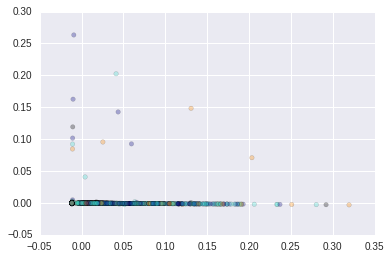

In [21]:
color = map(lambda x: 'navy' if x=='$' else 'turquoise' if x=='$$' else 'darkorange' if x=='$$$' else 'k', PCA_dollar2['price'])
plt.scatter(PCA_dollar2['x'].values, PCA_dollar2['y'].values, c=color, alpha= 0.3)
#xlim, ylim